In [1]:
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

E:\conda\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
E:\conda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


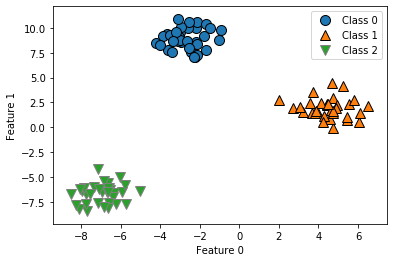

In [2]:
from sklearn.datasets import make_blobs

X,y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0],X[:, 1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0","Class 1","Class 2"])

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X,y)
print("Coefficient shape: ",linear_svm.coef_.shape)
print("Intercepe shape: ",linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercepe shape:  (3,)


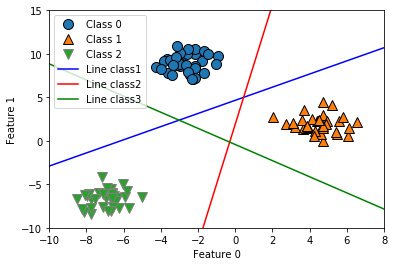

In [4]:
mglearn.discrete_scatter(X[:, 0],X[:, 1],y)
line = np.linspace(-15,15)
for coef, intetcept, color in zip(linear_svm.coef_,linear_svm.intercept_,['b','r','g']):
    plt.plot(line,-(line*coef[0]+intetcept)/coef[1],c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0","Class 1","Class 2","Line class1","Line class2","Line class3"])

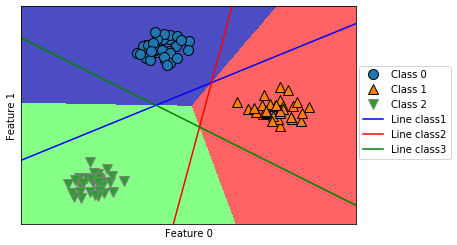

In [5]:
#线中间部分为最接近那条线对应的类别
mglearn.plots.plot_2d_classification(linear_svm,X,fill=True,alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intetcept, color in zip(linear_svm.coef_,linear_svm.intercept_,['b','r','g']):
    plt.plot(line,-(line*coef[0]+intetcept)/coef[1],c=color)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0","Class 1","Class 2","Line class1","Line class2","Line class3"],loc=(1.01,0.3))

In [6]:
#alpha值大，C值越小，模型越简单，如果仅有几个特征重要，应使用L1正则化
#理解如何进行预测容易，难以解释系数为何为某个值
#如果特征数量大于样本数量（列》行）线性模型表现较好，常用于大型数据集

In [7]:
#朴素贝叶斯，与线性模型相似，训练速度更快，但泛化稍差
X = np.array([[0,1,0,1],
              [1,0,1,1],
              [0,0,0,1],
              [1,0,1,0]])
y = np.array([0,1,0,1])

In [8]:
counts = {}
for label in np.unique(y):
    #对每个类别进行遍历
    #计算（求和）每个特征中1的个数
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n{}".format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


In [9]:
#gaussiannb,bernoullinb,multinomialnb
#gaussiannb用于连续数据，保存每个类别中每个特征的平均值和标准差，通常用于高维数据

#下面两个只有一个参数alpha，越大越平滑，复杂度越低，算法性能对alpha的鲁棒性相对较好，调整不会改变性能，但会略微提高精度
#通常用于稀疏计数数据，m通常优于b
#bernoullinb用于二分类数据，计算每个类别中每个特征不为0的元素个数
#multinomialnb用于计数数据，计算每个类别中每个特征的平均值

#可作为基准模型，适用于大型数据集，鲁棒性，高维数据集好

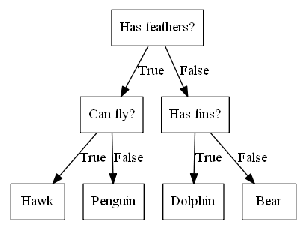

In [10]:
import graphviz
mglearn.plots.plot_animal_tree()

In [13]:
#sci只有预剪枝，及早停止树的生长
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(
    cancer.data,cancer.target,stratify=cancer.target,random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print("Training set score:{:.3f}".format(tree.score(X_train,y_train)))
print("Test set score:{:.3f}".format(tree.score(X_test,y_test)))

Training set score:1.000
Test set score:0.937


In [14]:
#限制树的深度及降低模型复杂度，减少过拟合，提高测试集精度
tree = DecisionTreeClassifier(random_state=0, max_depth=4)
tree.fit(X_train,y_train)
print("Training set score:{:.3f}".format(tree.score(X_train,y_train)))
print("Test set score:{:.3f}".format(tree.score(X_test,y_test)))

Training set score:0.988
Test set score:0.951


In [15]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file="tree.dot",class_names=["malignant","benign"],feature_names=cancer.feature_names,impurity=False,filled=True)

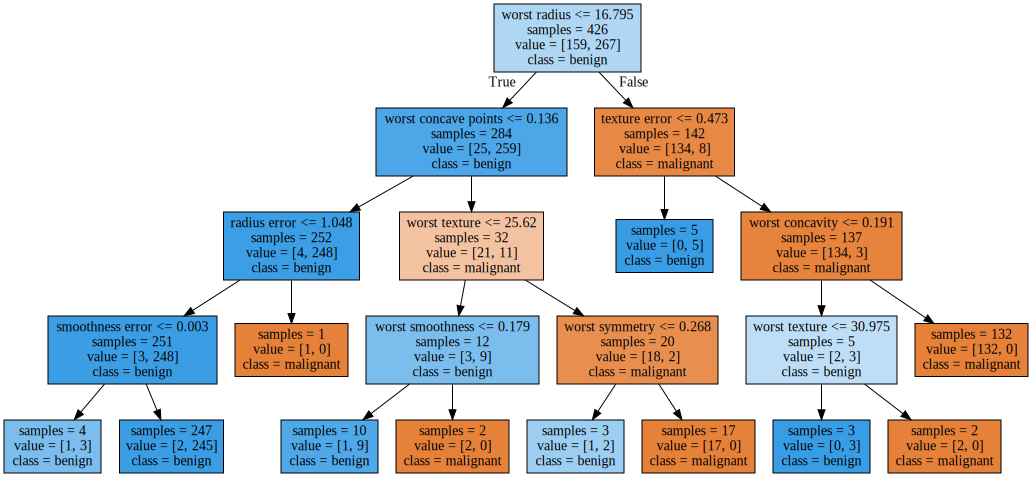

In [16]:
import graphviz

with open("tree.dot")as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [17]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


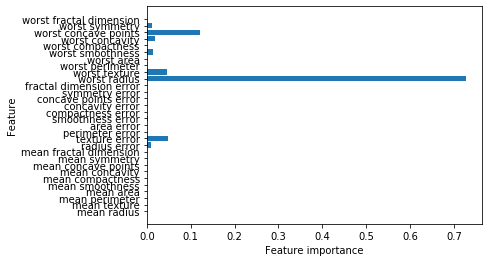

In [20]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


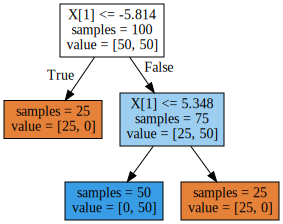

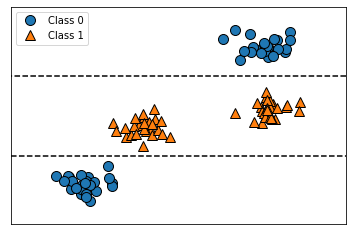

In [21]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0, 0.5, 'Price in $/Mbyte')

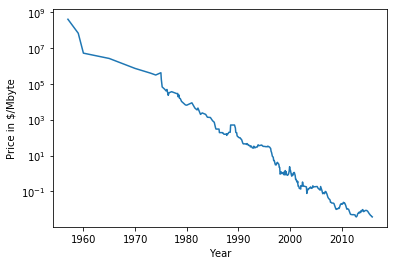

In [23]:
#用于回归的决策树不能外推，不能在训练集外进行预测
import pandas as pd
ram_prices = pd.read_csv("data/ram_price.csv")

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
#利用历史数据预测2000年后价格
data_train = ram_prices[ram_prices.date<2000]
data_test = ram_prices[ram_prices.date>=2000]

#基于日期预测价格
X_train = data_train.date[:,np.newaxis]
#利用对数变换得到数据和目标更简单的关系
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train,y_train)
linear_reg = LinearRegression().fit(X_train,y_train)
#对所有数据进行预测
X_all = ram_prices.date[:,np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

#对数变换逆运算
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

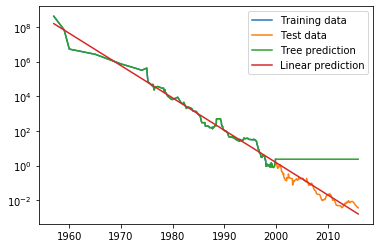

In [29]:
plt.semilogy(data_train.date,data_train.price,label="Training data")
plt.semilogy(data_test.date,data_test.price,label="Test data")
plt.semilogy(ram_prices.date,price_tree,label="Tree prediction")
plt.semilogy(ram_prices.date,price_lr,label="Linear prediction")
plt.legend()
#树没有生成新的响应（绿线水平）

In [ ]:
#优点，容易可视化，容易理解，不受数据缩放影响，无需预处理（标准化or归一化）
#常常过拟合，泛化性能差